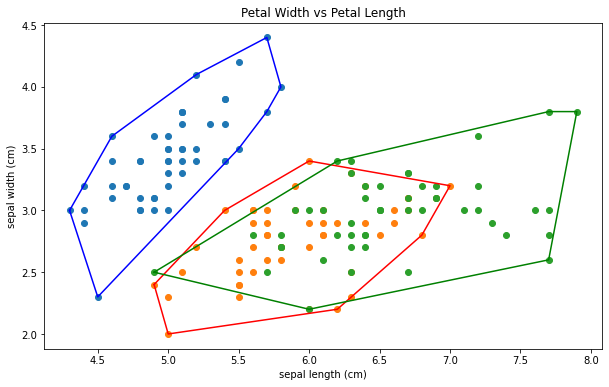

In [1]:
from ConvexHull import myConvexHull 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

model = myConvexHull()

for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    
    bucket = bucket.iloc[:,[0,1]].values   
    
    hull = model(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
   
    hull = np.vstack([hull, hull[0]])
    plt.plot(hull[:,0], hull[:,1], colors[i])
plt.show()